## Taxi Analysis

In [1]:
pwd

'C:\\Users\\loba8\\Documents\\Data Science\\Projects\\Taxi Analysis (Python)'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("Power BI Dataset taxi_organization_data.xlsx")

In [4]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,location,...,tip_amount,total_amount,weather,traffic,customer_id,driver_id,day_of_week,hour_of_day,trip_purpose,surge_pricing
0,V003,2024-07-05 14:04:12,2024-07-05 14:16:12,4,6.9,40.678362,-73.968892,40.639226,-74.015532,Suburbs,...,2.97,21.12,Rain,Moderate,CUST5612,DR745,Friday,14,Errands,False
1,V001,2024-05-16 15:53:50,2024-05-16 16:29:50,2,2.5,40.865106,-74.054843,40.869557,-73.831664,Uptown,...,2.06,10.14,Snow,Moderate,CUST2120,DR144,Thursday,15,Leisure,True
2,V004,2024-07-30 22:05:17,2024-07-30 23:05:17,4,1.4,40.666185,-73.891848,40.870419,-73.992159,Uptown,...,1.07,5.59,Snow,Moderate,CUST2138,DR625,Tuesday,22,Leisure,False
3,V004,2024-07-25 10:04:34,2024-07-25 10:53:34,1,6.3,40.614159,-73.811814,40.894846,-73.957828,Uptown,...,2.09,16.65,Cloudy,Light,CUST5697,DR753,Thursday,10,Leisure,False
4,V001,2024-07-09 21:10:46,2024-07-09 21:43:46,3,5.7,40.754890,-73.911257,40.751192,-73.869727,Downtown,...,4.74,22.19,Clear,Moderate,CUST1668,DR293,Tuesday,21,Errands,False


In [5]:
df.shape

(1000, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   vendor_id          1000 non-null   object        
 1   pickup_datetime    1000 non-null   datetime64[ns]
 2   dropoff_datetime   1000 non-null   datetime64[ns]
 3   passenger_count    1000 non-null   int64         
 4   trip_distance      1000 non-null   float64       
 5   pickup_latitude    1000 non-null   float64       
 6   pickup_longitude   1000 non-null   float64       
 7   dropoff_latitude   1000 non-null   float64       
 8   dropoff_longitude  1000 non-null   float64       
 9   location           1000 non-null   object        
 10  payment_type       1000 non-null   object        
 11  fare_amount        1000 non-null   float64       
 12  tip_amount         1000 non-null   float64       
 13  total_amount       1000 non-null   float64       
 14  weather  

In [7]:
df.describe()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,fare_amount,tip_amount,total_amount,hour_of_day
count,1000,1000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2024-06-17 07:11:32.807999744,2024-06-17 07:44:34.008000,2.438000,5.50260,40.746776,-73.921832,40.753438,-73.919310,16.474710,3.259770,19.734480,11.514000
min,2024-05-01 06:31:54,2024-05-01 06:40:54,1.000000,1.00000,40.578191,-74.149784,40.578439,-74.149750,2.210000,0.230000,2.490000,0.000000
25%,2024-05-25 14:49:53.249999872,2024-05-25 14:57:23.249999872,1.000000,3.40000,40.667124,-74.036476,40.669554,-74.029475,9.557500,1.720000,11.397500,6.000000
50%,2024-06-18 08:30:32,2024-06-18 09:14:32,2.000000,5.50000,40.744507,-73.917057,40.753389,-73.912172,15.790000,2.950000,18.985000,11.500000
75%,2024-07-09 17:15:27,2024-07-09 17:46:57,3.000000,7.70000,40.829995,-73.806263,40.838699,-73.806218,22.480000,4.500000,26.925000,17.000000
max,2024-07-31 20:58:48,2024-07-31 21:32:51,4.000000,10.00000,40.917337,-73.700632,40.917196,-73.700829,39.460000,11.180000,49.630000,23.000000
std,NaN,NaN,1.117768,2.55162,0.096471,0.132275,0.098213,0.128582,8.425625,1.934614,10.109822,6.763546


In [8]:
df.head(2)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,location,...,tip_amount,total_amount,weather,traffic,customer_id,driver_id,day_of_week,hour_of_day,trip_purpose,surge_pricing
0,V003,2024-07-05 14:04:12,2024-07-05 14:16:12,4,6.9,40.678362,-73.968892,40.639226,-74.015532,Suburbs,...,2.97,21.12,Rain,Moderate,CUST5612,DR745,Friday,14,Errands,False
1,V001,2024-05-16 15:53:50,2024-05-16 16:29:50,2,2.5,40.865106,-74.054843,40.869557,-73.831664,Uptown,...,2.06,10.14,Snow,Moderate,CUST2120,DR144,Thursday,15,Leisure,True


# Trip frequency over time

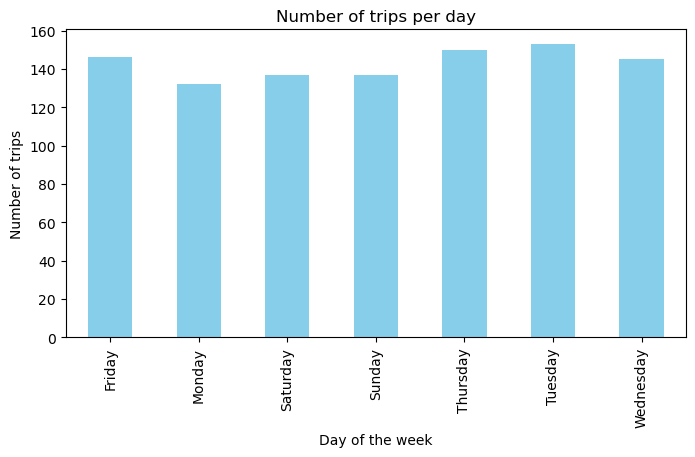

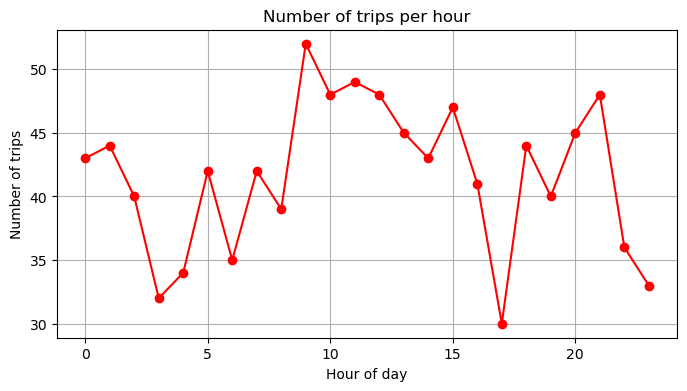

In [9]:
#plot trips per day
plt.figure(figsize = (8,4))
df["day_of_week"].value_counts().sort_index().plot(kind="bar", color="skyblue")
plt.xlabel("Day of the week")
plt.ylabel("Number of trips")
plt.title("Number of trips per day")
plt.show()

#plot trips per hour
plt.figure(figsize = (8,4))
df["hour_of_day"].value_counts().sort_index().plot(kind="line", marker="o", color="red")
plt.xlabel("Hour of day")
plt.ylabel("Number of trips")
plt.title("Number of trips per hour")
plt.grid()
plt.show()

# Effect of Distance on Fare Amount

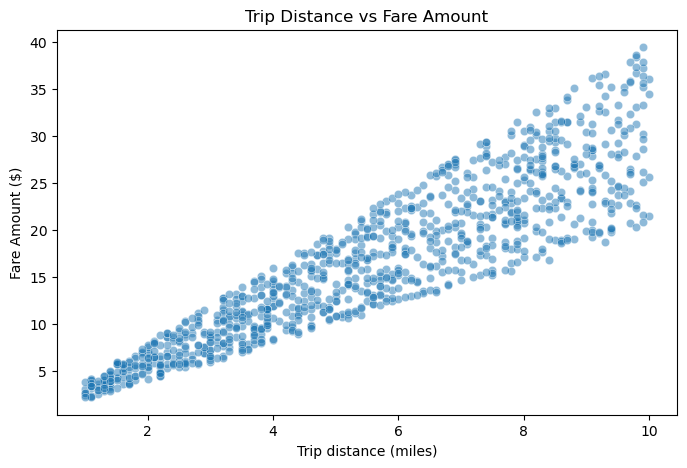

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["trip_distance"], y=df["fare_amount"], alpha=0.5)
plt.xlabel("Trip distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title("Trip Distance vs Fare Amount")
plt.show()

# Payment Type Distribution

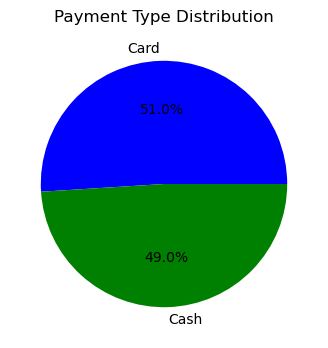

In [11]:
df["payment_type"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["blue", "green"], figsize=(4,4))
plt.title("Payment Type Distribution")
plt.ylabel("")
plt.show()

# Surge Pricing impact on Fare

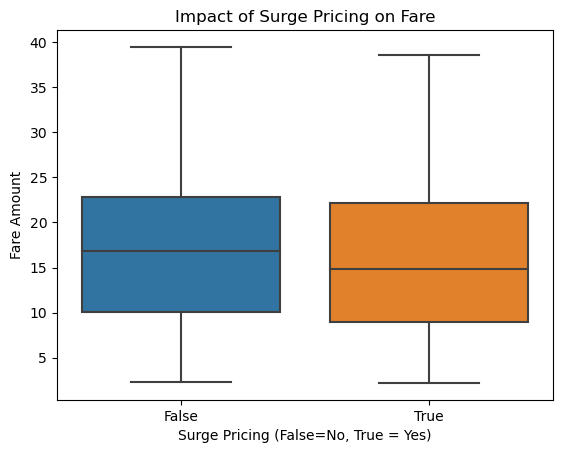

In [12]:
sns.boxplot(x=df["surge_pricing"], y=df["fare_amount"])
plt.xlabel("Surge Pricing (False=No, True = Yes)")
plt.ylabel("Fare Amount")
plt.title("Impact of Surge Pricing on Fare")
plt.show()

# Distribution of Passenger count

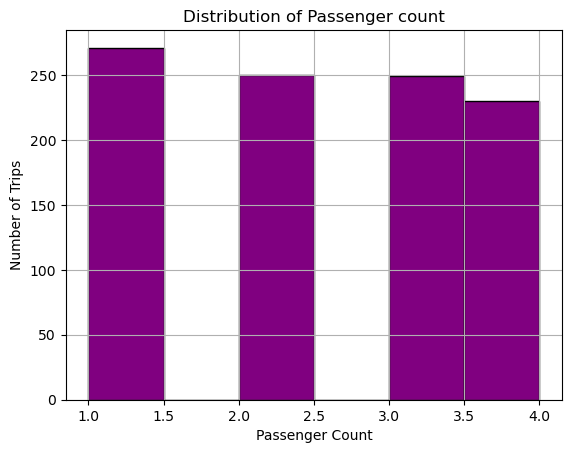

In [13]:
df["passenger_count"].hist(bins=6, color="purple", edgecolor = "black")
plt.xlabel("Passenger Count")
plt.ylabel("Number of Trips")
plt.title("Distribution of Passenger count")
plt.show()

# Effect of Weather and Traffic on Fare

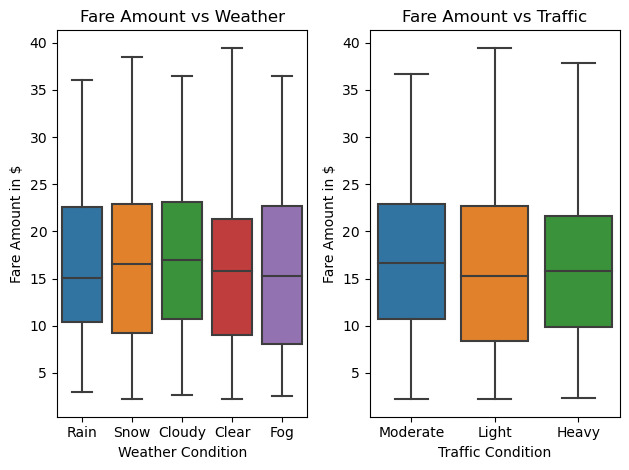

In [14]:
# Weather vs Fare
plt.subplot(1,2,1)
sns.boxplot(x=df["weather"], y=df["fare_amount"])
plt.xlabel("Weather Condition")
plt.ylabel("Fare Amount in $")
plt.title("Fare Amount vs Weather")

# Traffic vs Fare
plt.subplot(1,2,2)
sns.boxplot(x=df["traffic"], y=df["fare_amount"])
plt.xlabel("Traffic Condition")
plt.ylabel("Fare Amount in $")
plt.title("Fare Amount vs Traffic")

plt.tight_layout()
plt.show()

## Insights

#### 1. Trip Distance vs. Fare Amount
##### Longer trips lead to higher fares.
##### Impact: Helps in setting fare prices and making predictions.

#### 2. Payment Type Distribution
##### Card payments (51%) are slightly more than cash (49%).
##### Impact: Both should be available, but promoting card payments can make transactions easier.

#### 3. Number of Trips per Day
##### The number of trips is mostly the same each day.
##### Impact: Drivers can be assigned based on demand.

#### 4. Number of Trips per Hour
##### Trip numbers go up and down during the day, with busy hours in certain time slots.
##### Impact: More drivers and higher fares can be set during peak hours.

#### 5. Passenger Count Distribution
##### Most trips have 1 or 3 passengers, but 2-passenger trips are missing.
##### Possible Issue: There might be an error in data collection.
##### Impact: The missing 2-passenger trips should be checked.

#### 6. Surge Pricing and Fare Amount
##### Fares are higher when surge pricing is active.
##### Impact: Passengers should expect to pay more during busy hours.

#### 7. Fare vs. Weather & Traffic
##### Weather does not affect fare prices much.
##### Heavy traffic slightly increases fares but not by a lot.
##### Impact: There may be no need to change prices based on weather or traffic.


### Key Points
##### Surge pricing increases fares the most.
##### The missing 2-passenger trips need to be looked into.
##### Weather and traffic do not greatly affect fares.
